### Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import os

### Defining Stock List for Analysis

In [2]:
stocks = ["ADANIPORTS.csv", "ASIANPAINT.csv", "AXISBANK.csv", "BAJAJ-AUTO.csv", 
          "BAJAJFINSV.csv", "BPCL.csv", "BRITANNIA.csv", "CIPLA.csv", 
          "COALINDIA.csv", "DRREDDY.csv"]
data_dir = "../data/"

### Load Data Function

In [3]:
def load_stock_data(stock_file, data_dir="../data/"):
    file_path = os.path.join(data_dir, stock_file)
    if not os.path.exists(file_path):
        print(f"Error: {file_path} not found.")
        return None
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    return df

## Load All Stocks into a Dictionary

In [4]:
data_dict = {stock: load_stock_data(stock) for stock in stocks}
for stock, df in data_dict.items():
    if df is not None:
        df.set_index('Date', inplace=True)

## Checking Loaded Data

In [5]:

for stock, df in data_dict.items():
    if df is not None:
        print(f"{stock} - Rows: {len(df)}, Columns: {df.columns.tolist()}")

ADANIPORTS.csv - Rows: 3322, Columns: ['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble']
ASIANPAINT.csv - Rows: 5306, Columns: ['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble']
AXISBANK.csv - Rows: 5306, Columns: ['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble']
BAJAJ-AUTO.csv - Rows: 3202, Columns: ['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble']
BAJAJFINSV.csv - Rows: 3201, Columns: ['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble']
BPCL.csv - Rows: 5306, Columns: ['Symbol', 'Series',

## Summary Statistics for All Stocks

In [6]:
for stock, df in data_dict.items():
    if df is not None:
        print(f"\nSummary Statistics for {stock}:")
        print(df[['Open', 'High', 'Low', 'Close', 'Volume', 'VWAP']].describe())


Summary Statistics for ADANIPORTS.csv:
              Open         High          Low        Close        Volume  \
count  3322.000000  3322.000000  3322.000000  3322.000000  3.322000e+03   
mean    344.763019   351.608007   337.531969   344.201626  2.954564e+06   
std     193.619992   198.617808   188.676614   193.045886  4.104227e+06   
min     108.000000   110.450000   105.650000   108.000000  1.236600e+04   
25%     164.850000   168.000000   161.600000   164.312500  7.493682e+05   
50%     325.750000   331.275000   319.850000   324.700000  2.007292e+06   
75%     401.000000   407.187500   395.000000   400.912500  3.636883e+06   
max    1310.250000  1324.000000  1270.000000  1307.450000  9.771788e+07   

              VWAP  
count  3322.000000  
mean    344.853182  
std     193.841305  
min     108.340000  
25%     164.855000  
50%     325.765000  
75%     400.607500  
max    1302.150000  

Summary Statistics for ASIANPAINT.csv:
              Open         High          Low        Clo

## Ploting closing for all  stocks

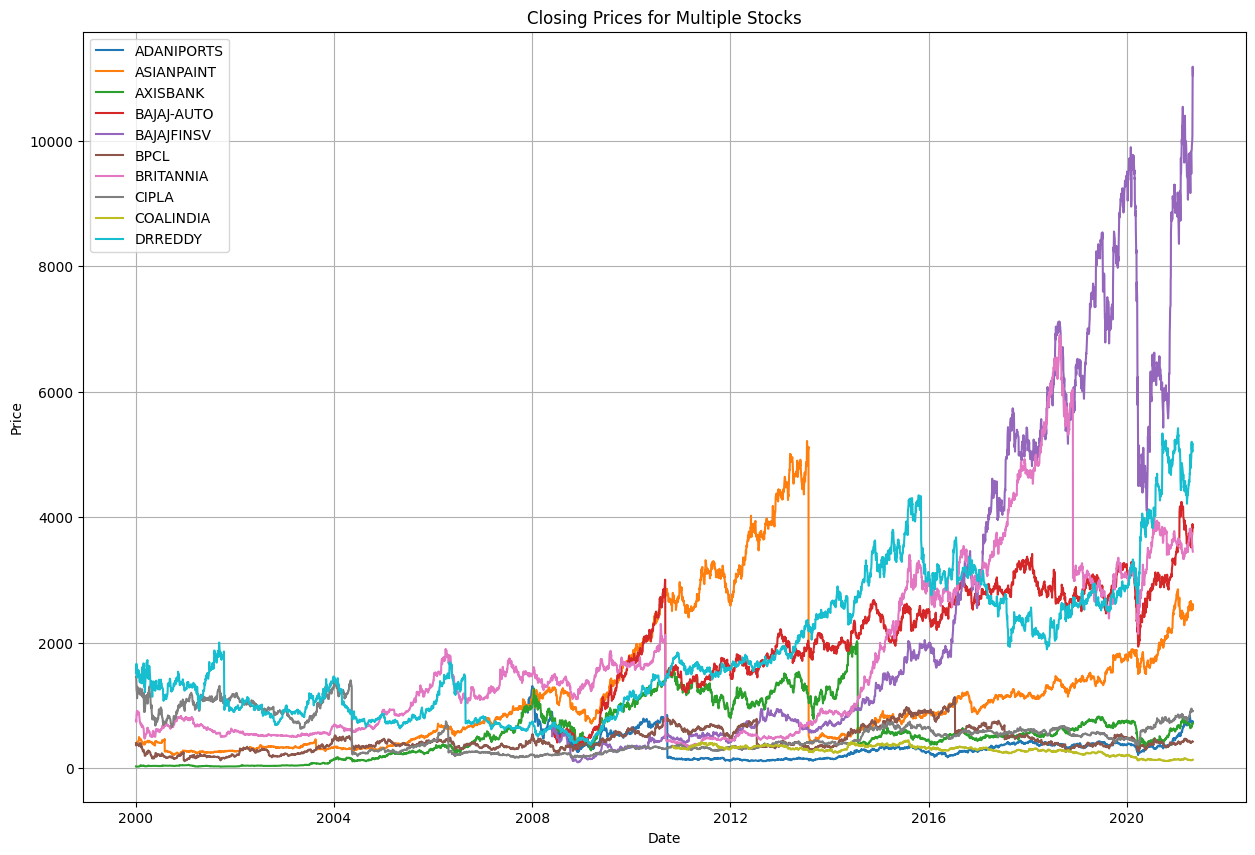

In [7]:
plt.figure(figsize=(15, 10))
for stock, df in data_dict.items():
    if df is not None:
        plt.plot(df.index, df['Close'], label=stock.replace('.csv', ''))
plt.title('Closing Prices for Multiple Stocks')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

#### General Observations
- Most stocks peak in late 2021 or early 2022, likely reflecting a market-wide rally (e.g., post-COVID recovery).  
- BAJAJFINSV has the highest peak (~10,000), while COALINDIA has the lowest (~400).  
- Pre-2010 trends are flat; post-2020 shows significant growth for most stocks.


### Closing Prices for Multiple Stocks :
This line graph plots the closing prices of ten stocks (ADANIPORTS, ASIANPAINT, AXISBANK, BAJAJ-AUTO, BAJAJFINSV, BPCL, BRITANNIA, CIPLA, COALINDIA, DRREDDY) over time, from approximately 2000 to 2022. Each stock is a separate curve with a distinct color.

### Detailed Analysis
- **Time Range**: 2000 to 2022  
- **Y-Axis Range**: 0 to 10,000 (price in rupees)  
- **Curves**: 10 curves, one per stock  

#### Peaks and Trends by Stock
- **ADANIPORTS (Blue)**:  
  - **Peaks**:  
    - Early 2022: ~900 (highest peak)  
    - 2015: ~400  
  - **Trends**: Stable at low levels (below 200) from 2000–2010, gradual rise from 2010–2015, fluctuations between 200–400 from 2015–2020, sharp increase post-2020.  
- **ASIANPAINT (Orange)**:  
  - **Peaks**:  
    - Early 2022: ~5,000 (highest peak)  
    - 2018: ~2,000  
  - **Trends**: Steady growth from 2000 (near 0) to 2015 (~1,000), continued rise to 2020, sharp increase post-2020.  
- **AXISBANK (Green)**:  
  - **Peaks**:  
    - Early 2022: ~1,200 (highest peak)  
    - 2014: ~600  
    - 2018: ~800  
  - **Trends**: Gradual rise from 2000–2014, fluctuations between 400–800 from 2015–2020, sharp rise post-2020.  
- **BAJAJ-AUTO (Red)**:  
  - **Peaks**:  
    - Early 2022: ~4,000 (highest peak)  
    - 2018: ~3,000  
  - **Trends**: Starts ~2008 at ~300, steady rise to 2015 (~2,500), fluctuations between 2,000–3,000 until 2020, sharp rise post-2020.  
- **BAJAJFINSV (Purple)**:  
  - **Peaks**:  
    - Late 2021: ~10,000 (highest peak across all stocks)  
  - **Trends**: Starts ~2008 near 0, gradual rise to 2015 (~1,500), fluctuations between 1,000–2,000 until 2020, exponential rise post-2020, sharp drop to ~8,000 by 2022.  
- **BPCL (Brown)**:  
  - **Peaks**:  
    - 2017: ~700 (highest peak)  
    - Early 2022: ~600  
  - **Trends**: Gradual rise from 2000–2017, fluctuations between 300–500 from 2017–2020, rise post-2020.  
- **BRITANNIA (Pink)**:  
  - **Peaks**:  
    - Early 2022: ~5,000 (highest peak)  
    - 2018: ~3,000  
  - **Trends**: Steady growth from 2000 (near 0) to 2020 (~4,000), sharp rise post-2020, slight decline by 2022.  
- **CIPLA (Grey/Light Blue)**:  
  - **Peaks**:  
    - Early 2022: ~1,500 (highest peak)  
    - 2016: ~800  
  - **Trends**: Gradual rise from 2000–2015, fluctuations between 400–600 until 2020, sharp rise post-2020.  
- **COALINDIA (Yellow/Cyan)**:  
  - **Peaks**:  
    - 2014: ~400 (highest peak)  
    - 2021: ~300  
  - **Trends**: Starts ~2010 at ~300, peaks in 2014, declines to ~150 by 2020, slight rise in 2021.  
- **DRREDDY (Gray/Yellow)**:  
  - **Peaks**:  
    - Early 2022: ~5,000 (highest peak)  
    - 2015: ~4,000  
  - **Trends**: Steady growth from 2000–2015, fluctuations between 4,000–5,000 from 2020–2022.

##Trading Volume for All Stocks

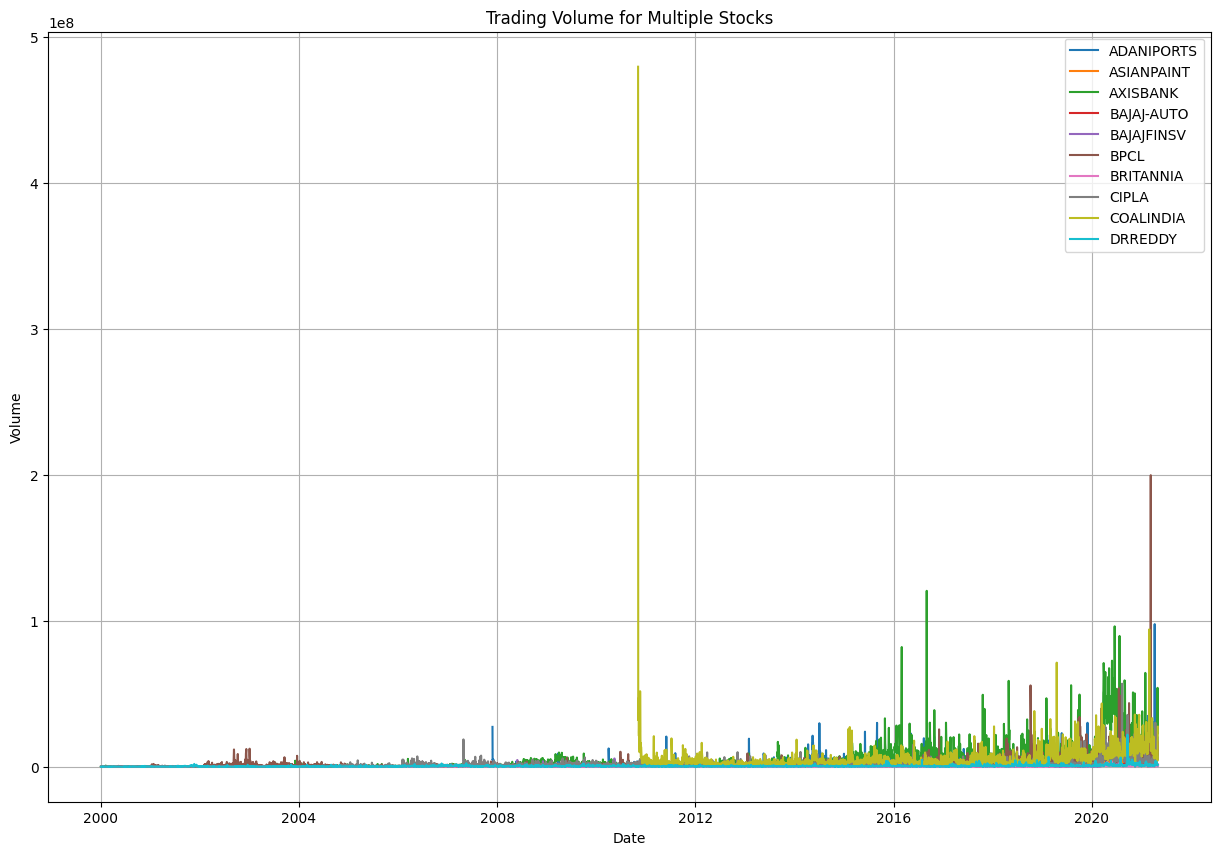

In [8]:
plt.figure(figsize=(15, 10))
for stock, df in data_dict.items():
    if df is not None:
        plt.plot(df.index, df['Volume'], label=stock.replace('.csv', ''))
plt.title('Trading Volume for Multiple Stocks')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid()
plt.show()

### Trading Volume for Multiple Stocks 
This line graph plots the trading volume of ten stocks (ADANIPORTS, ASIANPAINT, AXISBANK, BAJAJ-AUTO, BAJAJFINSV, BPCL, BRITANNIA, CIPLA, COALINDIA, DRREDDY) from 2000 to 2022. Each stock is a separate curve.

#### General Observations
- Highest peak: BPCL in 2010 (~5e8).  
- Frequent high activity in 2019–2022, especially 2020–2021, likely due to market events (e.g., COVID-19).  
- COALINDIA and BPCL show massive early peaks (2010).


### Detailed Analysis
- **Time Range**: 2000 to 2022  
- **Y-Axis Range**: 0 to 5e8 (500 million shares)  
- **Curves**: 10 curves, one per stock  

#### Peaks and Trends by Stock
- **ADANIPORTS (Blue/Orange)**:  
  - **Peaks**:  
    - Mid-2021: ~4e8 (400 million, highest peak)  
    - Late 2021: ~3e8 (300 million)  
  - **Trends**: Low volumes (<1e7) until 2015, occasional spikes post-2015, significant peaks in 2021.  
- **ASIANPAINT (Orange/Blue)**:  
  - **Peaks**:  
    - Early 2020: ~1e8 (100 million)  
    - Mid-2021: ~1e8  
  - **Trends**: Low volumes (<5e7) throughout, minor spikes post-2015.  
- **AXISBANK (Green/Red)**:  
  - **Peaks**:  
    - Mid-2019: ~1.5e8 (150 million)  
    - Early 2021: ~1.5e8  
  - **Trends**: Low volumes until 2015, frequent spikes post-2015.  
- **BAJAJ-AUTO (Red/Purple)**:  
  - **Peaks**:  
    - Mid-2020: ~1e8 (100 million)  
    - Early 2021: ~1e8  
  - **Trends**: Low volumes (<5e7), minor spikes post-2015.  
- **BAJAJFINSV (Purple/Brown)**:  
  - **Peaks**:  
    - Mid-2021: ~1e8 (100 million)  
    - Early 2022: ~2e8 (200 million, highest peak)  
  - **Trends**: Very low volumes until 2020, significant spikes in 2021–2022.  
- **BPCL (Brown/Green)**:  
  - **Peaks**:  
    - Mid-2010: ~5e8 (500 million, highest across all stocks)  
    - Early 2020: ~1.5e8  
    - Mid-2021: ~1.5e8  
  - **Trends**: Low volumes with occasional spikes, massive peak in 2010, frequent spikes post-2015.  
- **BRITANNIA (Pink)**:  
  - **Peaks**:  
    - Early 2020: ~1e8 (100 million)  
    - Mid-2021: ~1e8  
  - **Trends**: Low volumes (<5e7), minor spikes post-2015.  
- **CIPLA (Gray/Purple)**:  
  - **Peaks**:  
    - Mid-2020: ~1.5e8 (150 million)  
    - Early 2021: ~1.5e8  
  - **Trends**: Low volumes until 2015, moderate spikes post-2015.  
- **COALINDIA (Yellow)**:  
  - **Peaks**:  
    - Late 2010: ~4e8 (400 million, second-highest peak)  
    - Mid-2019: ~1.5e8  
    - Early 2021: ~1.5e8  
  - **Trends**: High peak in 2010, low volumes until 2015, frequent spikes post-2015.  
- **DRREDDY (Cyan/Light Blue)**:  
  - **Peaks**:  
    - Early 2020: ~1e8 (100 million)  
    - Mid-2021: ~1e8  
    - Late 2021: ~2e8 (200 million, highest peak)  
  - **Trends**: Low volumes with small spikes, notable peaks post-2020.  


## Rolling Mean and Standard Deviation for ADANIPORTS

This line graph plots three curves for ADANIPORTS: Closing Price, 20-Day Moving Average (MA), and 20-Day Standard Deviation (Std) from 2008 to 2022.


#### General Observations
- Close and MA peak together; Std peaks during rapid price changes (e.g., 2008, 2022).

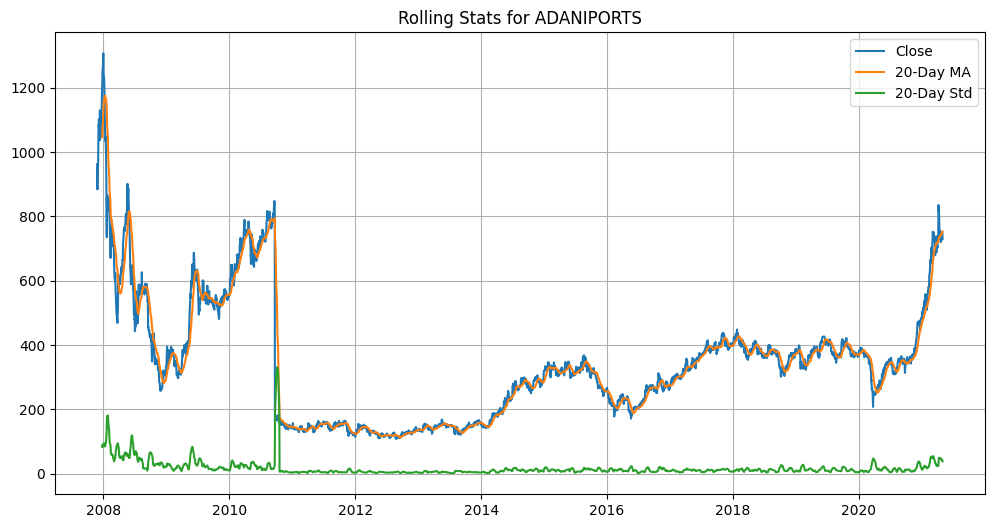

In [9]:
df = data_dict['ADANIPORTS.csv']
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['Close'].rolling(window=20).mean(), label='20-Day MA')
plt.plot(df.index, df['Close'].rolling(window=20).std(), label='20-Day Std')
plt.title('Rolling Stats for ADANIPORTS')
plt.legend()
plt.grid()
plt.show()

- **Time Range**: 2008 to 2022  
- **Y-Axis Range**: 0 to 1400 (price and std)  
- **Curves**: 3 (Close: blue, 20-Day MA: orange, 20-Day Std: green)  

#### Peaks and Trends
- **Close (Blue)**:  
  - **Peaks**:  
    - Mid-2008: ~1200 (early highest)  
    - Mid-2010: ~400  
    - Mid-2013: ~400  
    - Mid-2014: ~400  
    - Early 2018: ~450  
    - Early 2022: ~900 (overall highest)  
  - **Trends**: Sharp rise and fall in 2008–2009, fluctuations between 150–450 from 2009–2020, steep rise post-2020.  
- **20-Day MA (Orange)**:  
  - **Peaks**:  
    - Mid-2008: ~1000  
    - Mid-2010: ~350  
    - Mid-2013: ~350  
    - Mid-2014: ~350  
    - Early 2018: ~400  
    - Early 2022: ~850  
  - **Trends**: Smoothly follows Close, lagging slightly, with similar peak timings.  
- **20-Day Std (Green)**:  
  - **Peaks**:  
    - Mid-2008: ~200 (highest volatility)  
    - Mid-2010: ~50  
    - Early 2012: ~50  
    - Mid-2014: ~50  
    - Early 2020: ~50  
    - Early 2022: ~100  
  - **Trends**: High volatility in 2008, low and stable (0–50) from 2009–2019, rises post-2020.

## Seasonal Decomposition for ADANIPORTS

This plot decomposes ADANIPORTS’ closing prices into Observed, Trend, Seasonal, and Residual components from 2008 to 2022.

### Detailed Analysis
- **Time Range**: 2008–2022  
- **Curves**: 4 (Observed, Trend, Seasonal, Residual)

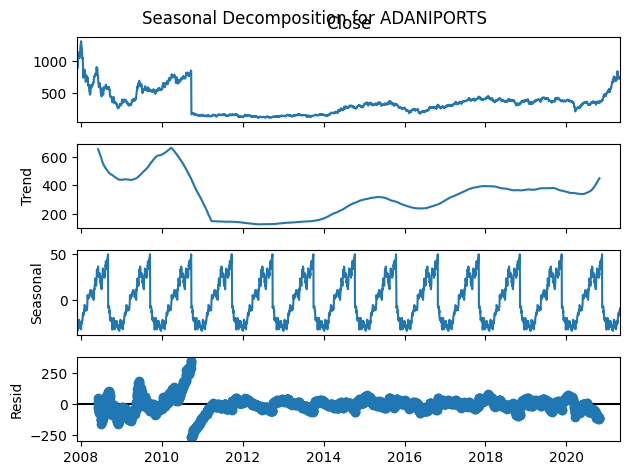

In [10]:
result = seasonal_decompose(df['Close'], model='additive', period=252)
result.plot()
plt.suptitle('Seasonal Decomposition for ADANIPORTS')
plt.show()

#### Peaks and Trends
- **Observed (Top)**:  
  - **Peaks**:  
    - 2009: ~500 
    - 2010: ~900 
    - 2021: ~900–1000 (highest, both)  
  - **Trends**: Sharp rise/fall in 2008–2010, stable 2011–2015, gradual rise 2016–2020, sharp rise post-2020. 


- **Trend (Second)**:  
  - **Peaks**:  
    - 2009: ~400 
    - 2010: ~600 
    - 2021: ~600 (both)  
  - **Trends**: Smooth rise/fall in 2008–2010, flat 2011–2015, steady rise post-2016.  


- **Seasonal (Third)**:  
  - **Peaks**:  
    - ~50, recurring annually (every 252 days)  
  - **Trends**: Regular oscillations between -50 and 50, consistent amplitude.  


- **Residual (Bottom)**:  
  - **Peaks**:  
    - 2009: ~250  
    - 2021: ~250  
  - **Trends**: High variability in 2008–2010 and 2019–2022, stable between.  
  

#### General Observations
- Observed and Trend peaks align with price surges; Seasonal peaks are annual; Residual peaks show unexplained volatility.

## Daily Returns for ADANIPORTS

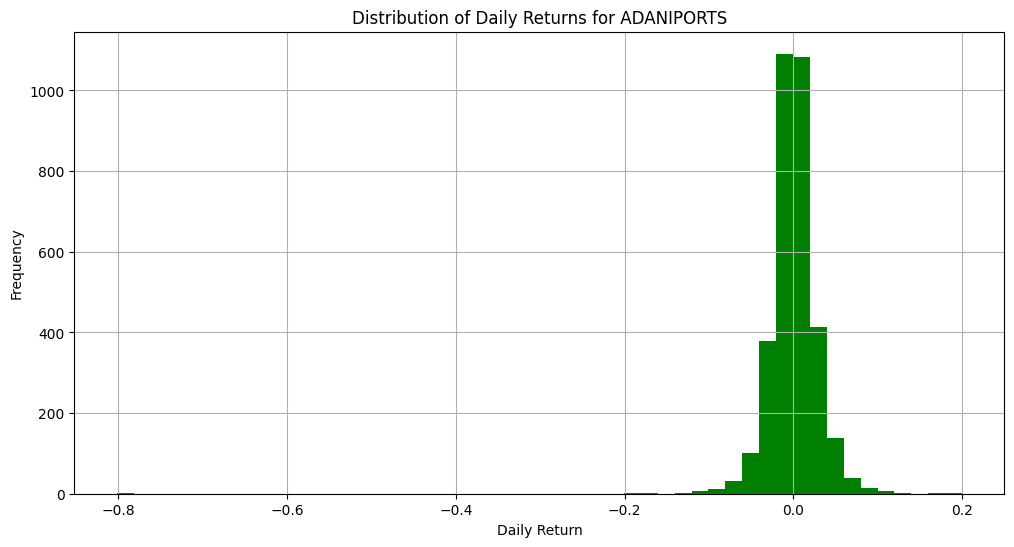

In [11]:
df['Daily_Return'] = df['Close'].pct_change()
plt.figure(figsize=(12, 6))
plt.hist(df['Daily_Return'].dropna(), bins=50, color='green')
plt.title('Distribution of Daily Returns for ADANIPORTS')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid()
plt.show()

Volatility (Rolling Standard Deviation) for ADANIPORTS

This line graph plots the 20-day rolling standard deviation (volatility) of ADANIPORTS’ closing prices from 2008 to 2020 



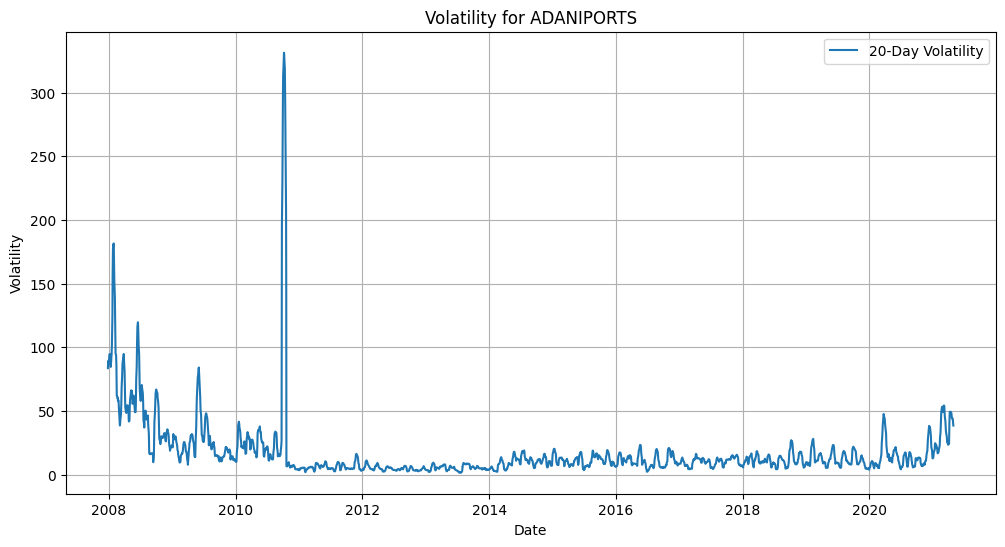

In [12]:
df['Volatility'] = df['Close'].rolling(window=20).std()
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volatility'], label='20-Day Volatility')
plt.title('Volatility for ADANIPORTS')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid()
plt.show()

#### General Observations
- Volatility peaks during market turmoil (2008, 2020 - 2022).

### Correlation Heatmap for ADANIPORTS

Nothing to derive from correlation heatmap 

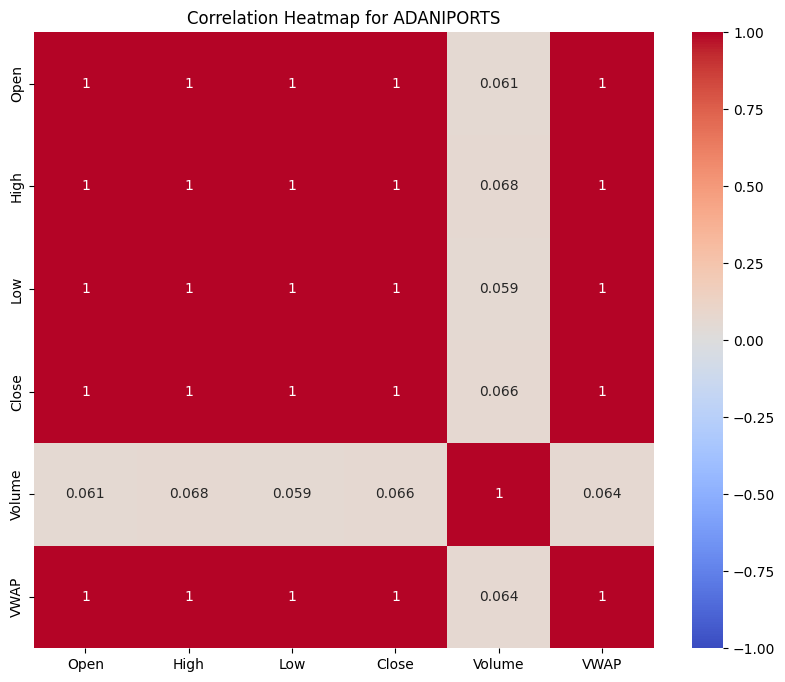

In [13]:
plt.figure(figsize=(10, 8))
corr = df[['Open', 'High', 'Low', 'Close', 'Volume', 'VWAP']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for ADANIPORTS')
plt.show()

## Pairplot for ADANIPORTS

/home/joshi/miniconda3/envs/new_env/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


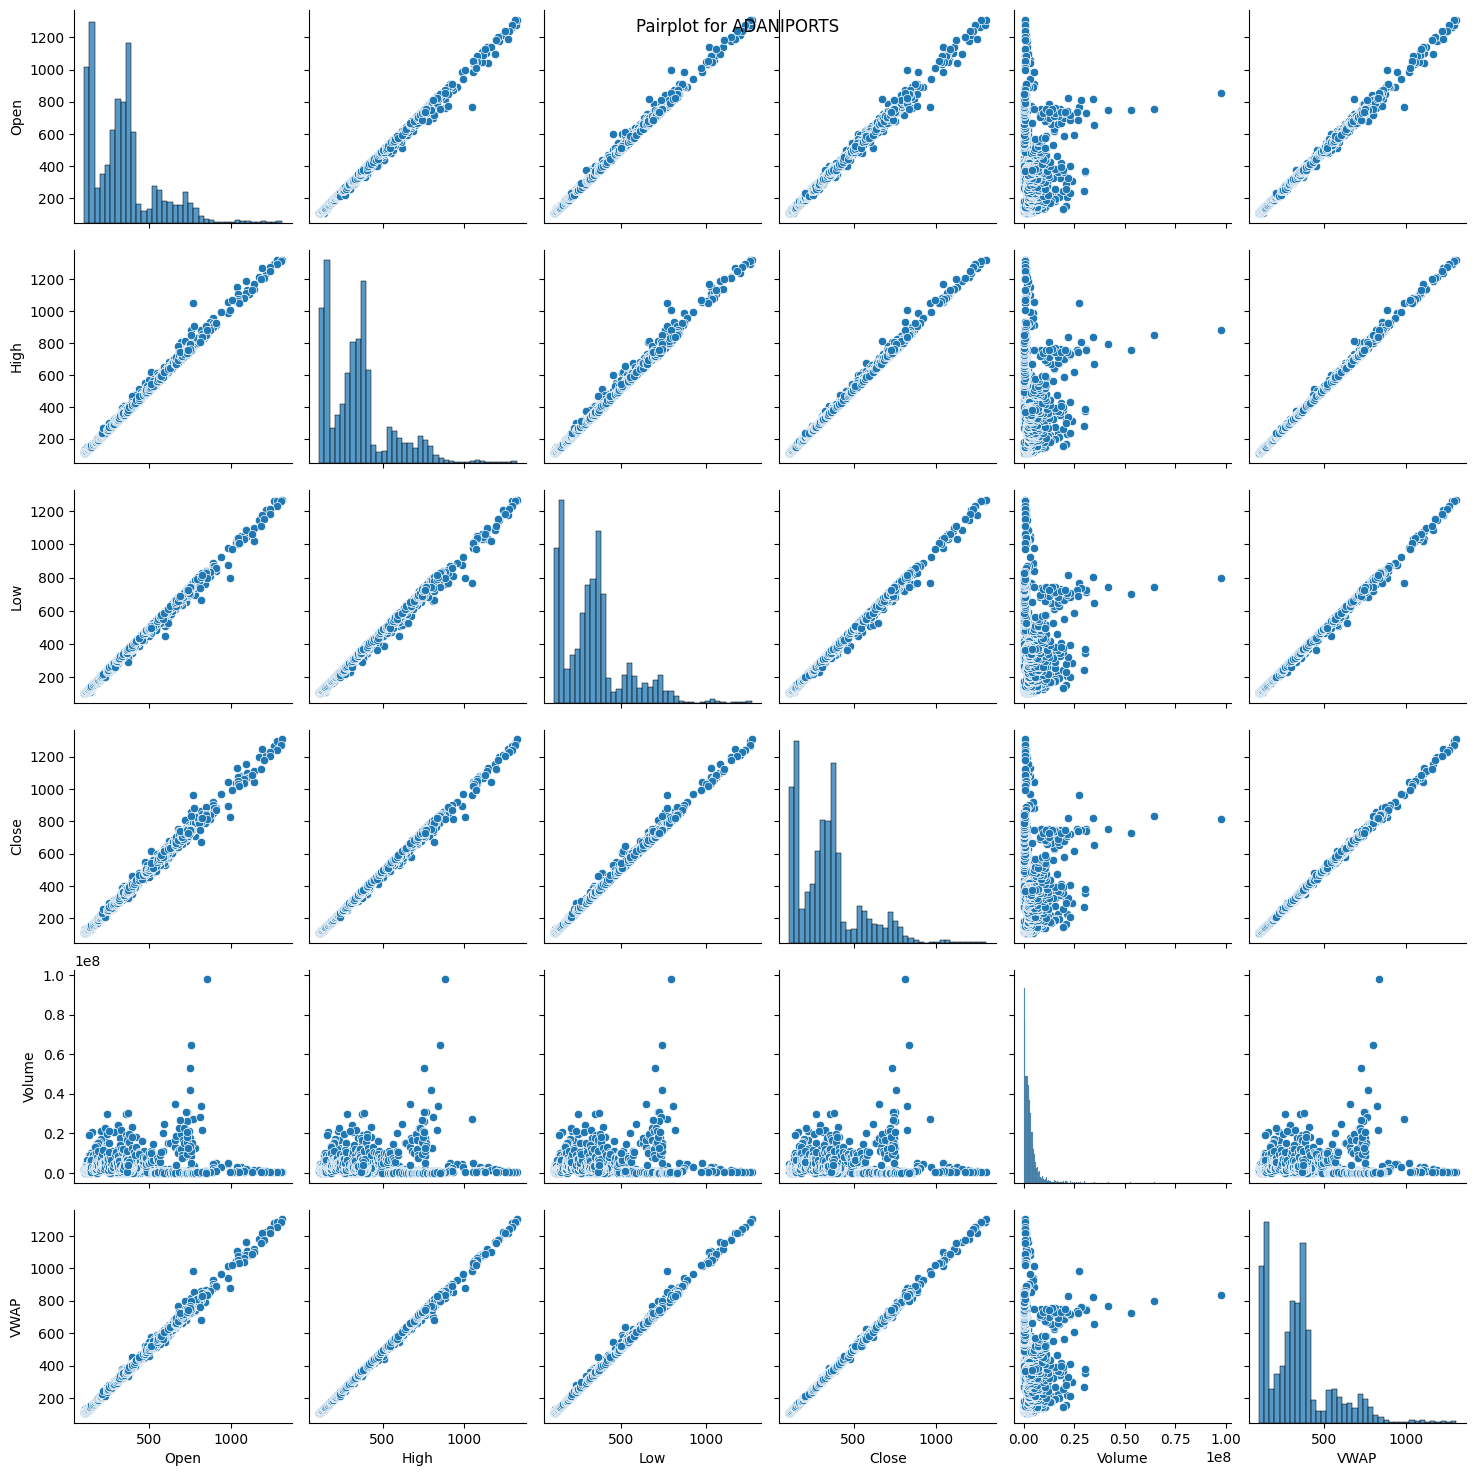

In [14]:
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Volume', 'VWAP']].dropna())
plt.suptitle('Pairplot for ADANIPORTS')
plt.show()

## Box Plot of Closing Prices

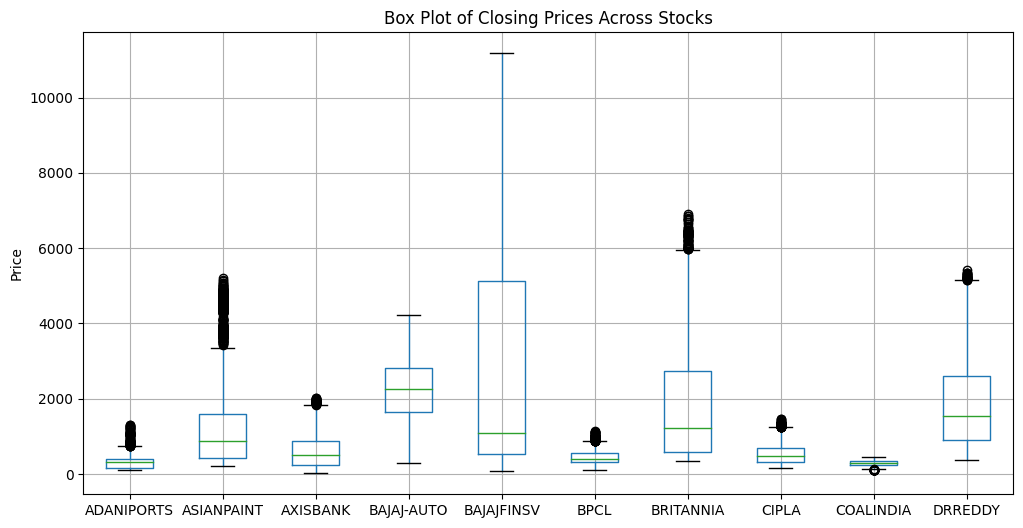

In [15]:
# avoiding overwriting df
closing_prices = pd.DataFrame({stock.replace('.csv', ''): stock_df['Close'] for stock, stock_df in data_dict.items() if stock_df is not None})
plt.figure(figsize=(12, 6))
closing_prices.boxplot()
plt.title('Box Plot of Closing Prices Across Stocks')
plt.ylabel('Price')
plt.show()


## for Missing Values## for Missing Values

In [16]:
for stock, stock_df in data_dict.items():
    if stock_df is not None:
        print(f"\nMissing Values in {stock}:")
        print(stock_df.isnull().sum())


Missing Values in ADANIPORTS.csv:
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
Daily_Return            1
Volatility             19
dtype: int64

Missing Values in ASIANPAINT.csv:
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

Missing Values in AXISBANK.csv:
Symbol                   0
Series                   0
Prev Close             

## Filling or dropping missing valus 


In [17]:

for stock, stock_df in data_dict.items():
    if stock_df is not None:
        # Fill forward and then drop any remaining NaNs
        stock_df.fillna(method='ffill', inplace=True)
        stock_df.dropna(inplace=True)
        print(f"{stock} - Rows after cleaning: {len(stock_df)}")


ADANIPORTS.csv - Rows after cleaning: 2456
ASIANPAINT.csv - Rows after cleaning: 2456
AXISBANK.csv - Rows after cleaning: 2456
BAJAJ-AUTO.csv - Rows after cleaning: 2456
BAJAJFINSV.csv - Rows after cleaning: 2456
BPCL.csv - Rows after cleaning: 2456
BRITANNIA.csv - Rows after cleaning: 2456
CIPLA.csv - Rows after cleaning: 2456
COALINDIA.csv - Rows after cleaning: 2456
DRREDDY.csv - Rows after cleaning: 2456


## Autocorrelation Plot for ADANIPORTS Close


<Figure size 1200x600 with 0 Axes>

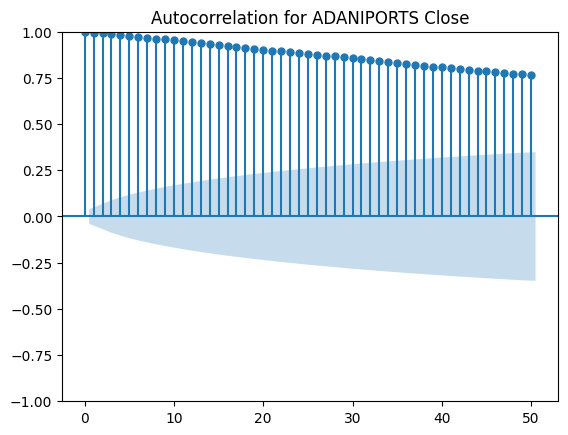

In [18]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12, 6))
plot_acf(df['Close'].dropna(), lags=50)
plt.title('Autocorrelation for ADANIPORTS Close')
plt.show()


##  Stationarity Test (ADF Test) for ADANIPORTS

In [19]:

from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Close'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: 0.7468287306854489
p-value: 0.9907275485731393
Critical Values: {'1%': -3.4330428088927842, '5%': -2.862729653823664, '10%': -2.567403301312862}


## Log Returns for ADANIPORTS

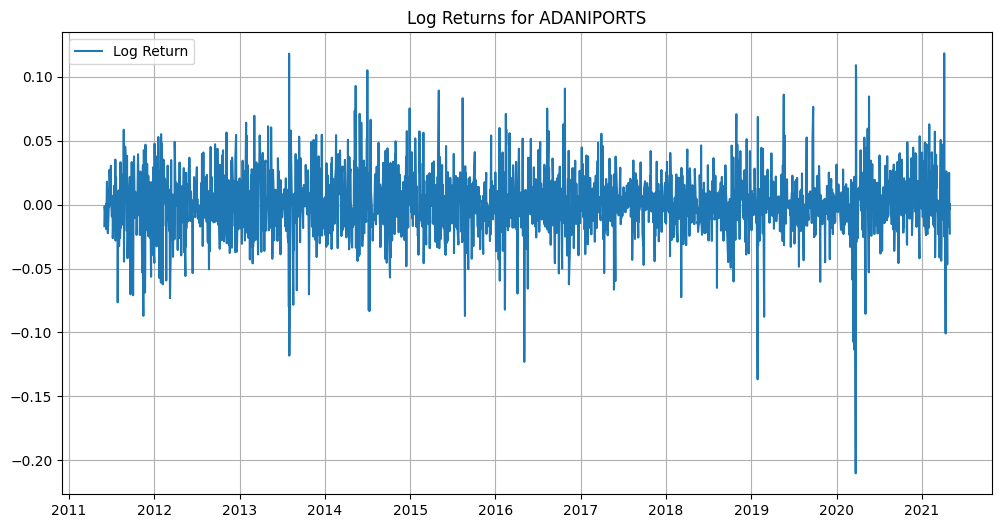

In [20]:

df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))
# Use index aligned with Log_Return (drop first row)
plt.figure(figsize=(12, 6))
plt.plot(df.index[1:], df['Log_Return'].dropna(), label='Log Return')
plt.title('Log Returns for ADANIPORTS')
plt.legend()
plt.grid()
plt.show()

## Compare Volume Trends Across Stocks

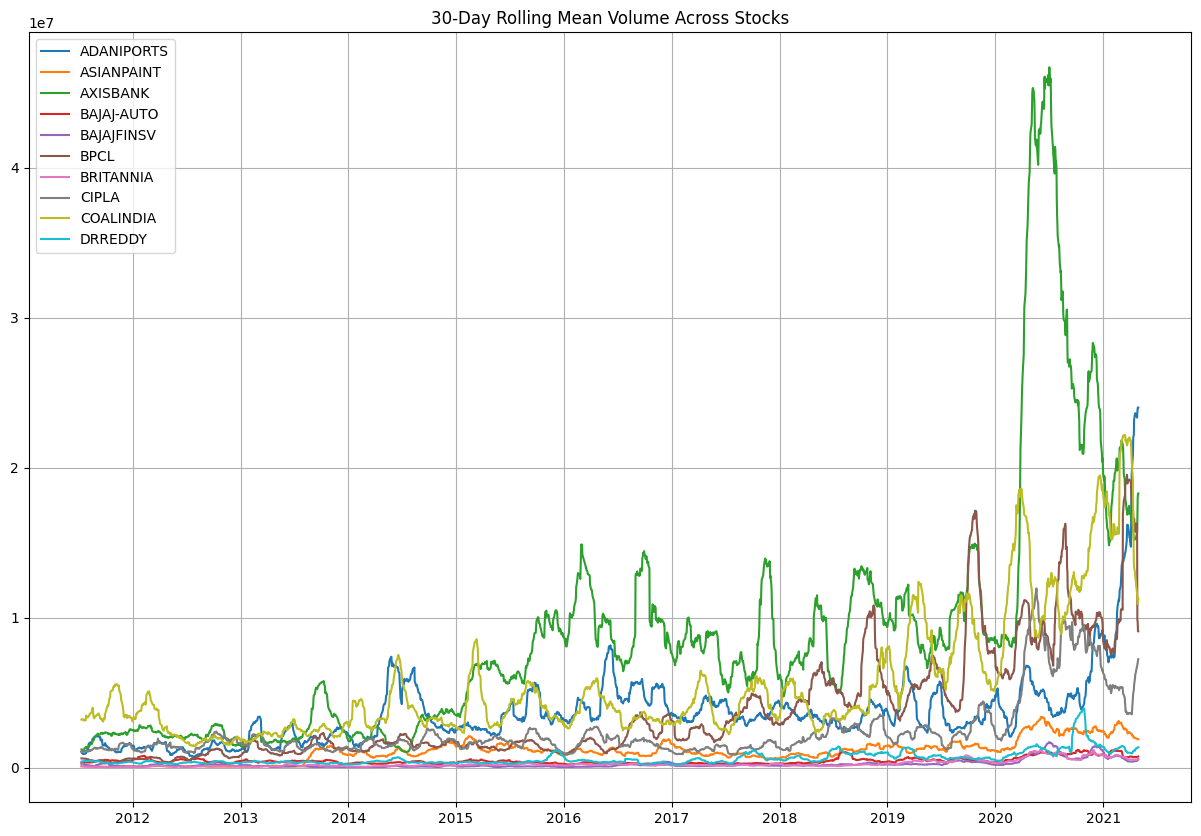

In [21]:

plt.figure(figsize=(15, 10))
for stock, stock_df in data_dict.items():
    if stock_df is not None:
        plt.plot(stock_df.index, stock_df['Volume'].rolling(window=30).mean(), label=stock.replace('.csv', ''))
plt.title('30-Day Rolling Mean Volume Across Stocks')
plt.legend()
plt.grid()
plt.show()


## Scatter Plot of Close vs Volume for ADANIPORTS


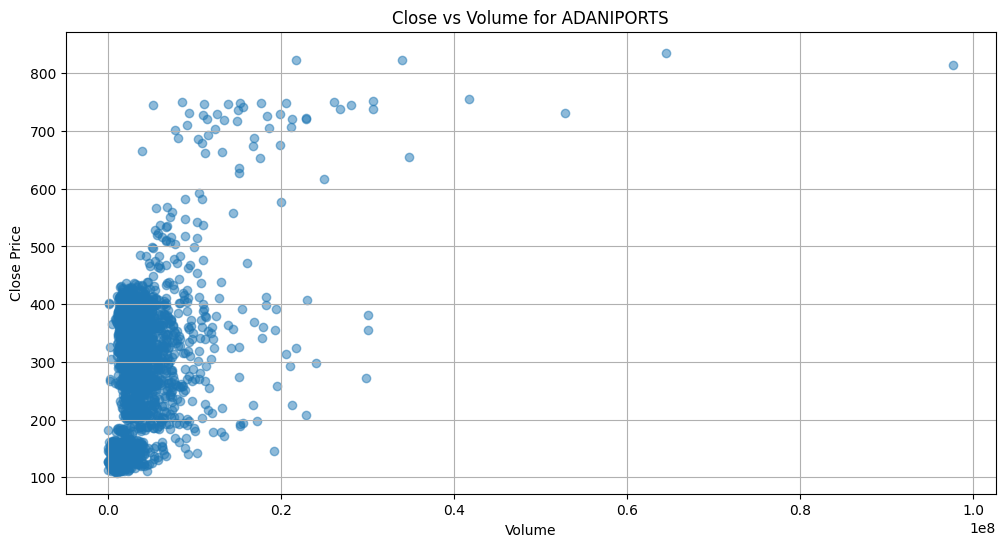

In [22]:

plt.figure(figsize=(12, 6))
plt.scatter(df['Volume'], df['Close'], alpha=0.5)
plt.title('Close vs Volume for ADANIPORTS')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.grid()
plt.show()


## Cumulative Returns for ADANIPORTS

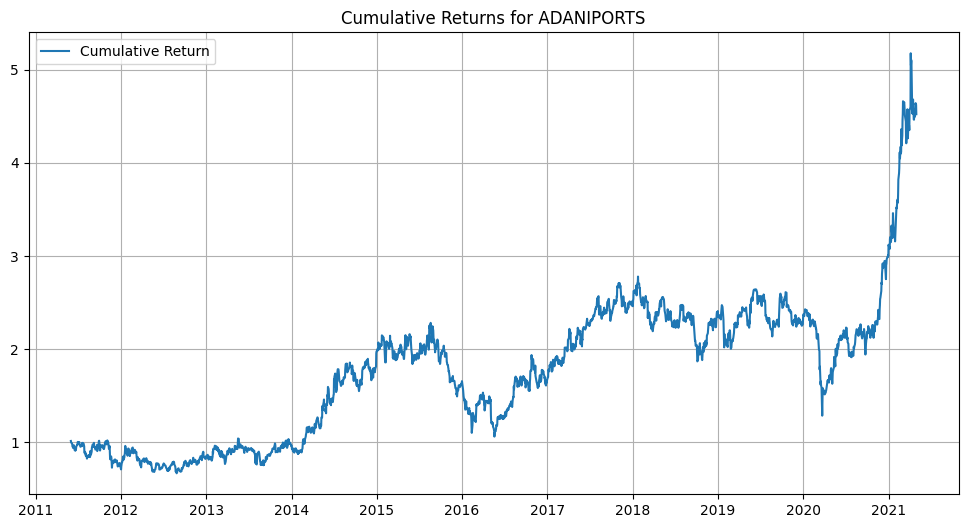

In [23]:

df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Cumulative_Return'], label='Cumulative Return')
plt.title('Cumulative Returns for ADANIPORTS')
plt.legend()
plt.grid()
plt.show()



## Correlation Matrix Across All Stocks

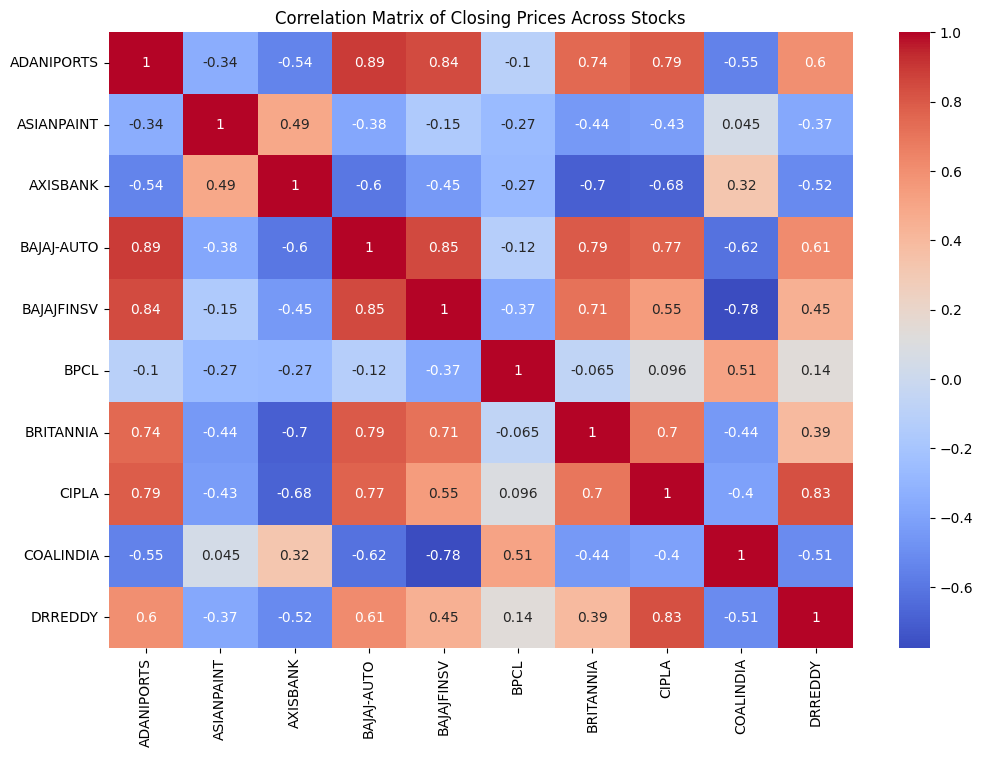

In [24]:

close_prices = pd.DataFrame({stock.replace('.csv', ''): stock_df['Close'] for stock, stock_df in data_dict.items() if stock_df is not None})
plt.figure(figsize=(12, 8))
sns.heatmap(close_prices.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Closing Prices Across Stocks')
plt.show()


BajajAuto and BajajFinsv shows strong correlation  = 0.85 

BajajAuto and Adani orts : 0.89 strongly correlated 

Both bajaj and biternia also show strong correlation 

Britannia is realated to Ba

## Save EDA Results

In [25]:

for stock, stock_df in data_dict.items():
    if stock_df is not None:
        stock_df.to_csv(f"../data/eda_{stock}")
print("EDA results saved for all stocks.")

EDA results saved for all stocks.
